<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Collection</a></span><ul class="toc-item"><li><span><a href="#Spotify" data-toc-modified-id="Spotify-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Spotify</a></span></li><li><span><a href="#Last.fm-API" data-toc-modified-id="Last.fm-API-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Last.fm API</a></span></li></ul></li><li><span><a href="#Data-Cleansing" data-toc-modified-id="Data-Cleansing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleansing</a></span><ul class="toc-item"><li><span><a href="#Clean-Spotify-Data" data-toc-modified-id="Clean-Spotify-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clean Spotify Data</a></span></li><li><span><a href="#Combine-Data" data-toc-modified-id="Combine-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Combine Data</a></span></li><li><span><a href="#Alter-Values" data-toc-modified-id="Alter-Values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Alter Values</a></span></li><li><span><a href="#Data-Type-Conversion" data-toc-modified-id="Data-Type-Conversion-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Data Type Conversion</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Filter" data-toc-modified-id="Filter-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Filter</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#Impute-from-Existing-Data" data-toc-modified-id="Impute-from-Existing-Data-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Impute from Existing Data</a></span></li><li><span><a href="#Impute-from-API" data-toc-modified-id="Impute-from-API-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>Impute from API</a></span></li></ul></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Top-Music" data-toc-modified-id="Top-Music-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Top Music</a></span></li></ul></li><li><span><a href="#What's-Next?" data-toc-modified-id="What's-Next?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What's Next?</a></span></li></ul></div>

# Personal Music Listening Report <a class='tocSkip'>
Hello! This time we will analyze my music listening pattern since the beginning of year 2020. The data of my playlist history will be fetched from [Last.fm API](https://www.last.fm/api/). [Last.fm](https://www.last.fm/) is an online music service that lets us stream our favorite music for free while offering great listening, watching, and sharing features. What makes last.fm unique from the other services is their **scrobbling system**. Every time we play a track from other music applications (Spotify, Google Play Music, YouTube Music, etc), the track is added, or scrobbled, to our Last.fm account. This allows us to share our musical tastes, make and receive recommendations from other users, and create custom radio stations.

Last.fm also provides us a quite decent [weekly music listening report](https://www.last.fm/user/tomythovens/listening-report/week). But when we want to see monthly and yearly, unwanted things happened:

<img src="asset/Last.month.png" width="400">

Yes, they will provide the report if we upgrade our account to Last.fm Pro :( Therefore, how about we create our customizable visualization by utilizing Python packages for free? Wait... but another problem is that I had just made my Last.fm account [tomythovens](https://www.last.fm/user/tomythovens) on 16 April 2020, so the data is incomplete for 2020. How we overcome the problem? Worry no more! As per January 2020, Spotify provides us access to request our music streaming history for the past one year through the [Privacy settings](https://www.spotify.com/ca-en/account/privacy/) menu (detail will be provided later on, so stay tune). Thanks to the [General Data Protection Regulation (GDPR) Article 15](https://support.spotify.com/ca-en/account_payment_help/privacy/gdpr-article-15-information/). Therefore for this notebook, we'll be combining both data from Spotify (1 January - 16 April) and Last.fm (17 April onwards).

# Import Libraries
Firstly, before we proceed any further, we have to import necessary Python packages mainly for Data Collection, Analysis, and Visualization.

In [1]:
# Data Collection
import pylast
import requests
from tqdm.notebook import trange
import time

# Data Analysis
import pandas as pd
from datetime import datetime
import pytz as tz
import math

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import calmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Markdown as md
import re

# Visualization Settings
plt.style.use("seaborn")

# Data Collection

## Spotify

As promised before, here I present the step-by-step on how I get my own Spotify streaming history:

1. Login to your account on [Spotify website](https://www.spotify.com/)
2. Navigate to [Privacy settings](https://www.spotify.com/ca-en/account/privacy/) menu
3. Scroll down until you find the following "Request" button:

<img src="asset/request1.png" width="500">

4. Check your email from Spotify and click "Confirm" to proceed your request:

<img src="asset/request2.png" width="250">

5. Done! The only thing left is to wait for Spotify to prepare your data file. This can take up to **30 days** to complete. But don't worry, for me, it's only **62 hours** (Requested on 17 April 2020 00:06 and Ready by 19 April 2020 14:23)

6. You'll receive an email when it is ready to download, as follows:

<img src="asset/request3.png" width="250">

Complete data description can be seen here: [Understanding my data](https://support.spotify.com/uk/account_payment_help/privacy/understanding-my-data/).

In this section, we'll do data cleansing on my Spotify streaming history, provided in `StreamingHistory0.json`, and convert it to CSV file.

In [2]:
spotify = pd.read_json("dataset/StreamingHistory0.json")
spotify.head()

,endTime,artistName,trackName,msPlayed
0,2019-04-17 17:02,ITZY,달라달라 (DALLA DALLA),2880
1,2019-04-18 06:02,ITZY,달라달라 (DALLA DALLA),31586
2,2019-04-18 06:21,ITZY,달라달라 (DALLA DALLA),168358
3,2019-04-18 06:24,ITZY,WANT IT?,200303
4,2019-04-18 06:25,ITZY,WANT IT?,15912


In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     7897 non-null   object
 1   artistName  7897 non-null   object
 2   trackName   7897 non-null   object
 3   msPlayed    7897 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 246.9+ KB


According to [Spotify](https://support.spotify.com/uk/account_payment_help/privacy/understanding-my-data/), `StreamingHistory0.json` contains a list of items (e.g. songs, videos, and podcasts) listened to or watched in the past year, including:

- `endTime`: Date and time of when the stream ended in UTC format (Coordinated Universal Time zone).
- `artistName`: Name of "creator" for each stream (e.g. the artist name if a music track).
- `trackName`: Name of items listened to or watched (e.g. title of music track or name of video). 
- `msPlayed`: Stands for how many mili-seconds the track was listened.

`spotify` data will be cleanse on the next section.

## Last.fm API
My ongoing music streaming history will be fetched from [Last.fm API](https://www.last.fm/api/). We'll be creating a `get_scrobbles()` function to iterate all pages that exist on the page. Here's the data description:
- `artist_name`: Name of artist
- `album_name`: Name of track's album
- `track_name`: Name of the track (song) listened
- `datetime`: Date and time of when the track is scrobbled in UTS format (UNIX Time Stamp)
- `image_url`: URL of `album_name` image in 300x300 pixels size

In [4]:
def get_scrobbles(username, api_key, page=1):
    url = 'https://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={}&api_key={}&page={}&format=json'

    responses = []
    scrobbles_list = []

    request_url = url.format(username, api_key, page)
    response = requests.get(request_url).json()
    pages = int(response['recenttracks']['@attr']['totalPages'])

    print('{} total pages to be fetched'.format(pages))

    time.sleep(1)
    for page in trange(1, int(pages) + 1):
        request_url = url.format(username, api_key, page)
        responses.append(requests.get(request_url))

    for response in responses:
        scrobbles = response.json()
        if 'recenttracks' not in scrobbles.keys():
            continue
        for scrobble in scrobbles['recenttracks']['track']:
            # ignore "now playing"
            if '@attr' not in scrobble:
                scrobble_dict = {
                    #'artist_id': scrobble['artist']['mbid'],
                    'artist_name': scrobble['artist']['#text'],
                    #'album_id': scrobble['album']['mbid'],
                    'album_name': scrobble['album']['#text'],
                    #'track_id': scrobble['mbid'],
                    'track_name': scrobble['name'],
                    'datetime': datetime.fromtimestamp(int(scrobble['date']['uts'])),
                    'image_url': scrobble['image'][-1]['#text']
                }
                scrobbles_list.append(scrobble_dict)

    return scrobbles_list

`API_KEY` and `API_SECRET` are being used in order to be authorized during accessing data using an API. These API hex codes can be obtained from [Create API Account form](https://www.last.fm/api/account/create) on Last.fm as follows:

<img src="asset/create_api.png" width="400">

`get_scrobbles()` function is called to fetch data in a form of Python dictionary (equivalent to JSON). This process may take several minutes depending on how many `scrobbles` to be fetched. The fetched data is then saved into a JSON file to be imported later on.

In [5]:
'''
I won't share my API_KEY and API_SECRET
I save it only on my local for privacy reason
Feel free to use your own USERNAME, API_KEY, and API_SECRET
'''
from decouple import config
USERNAME = "tomythovens"
API_KEY = config('API_KEY')
API_SECRET = config('API_SECRET')

In [6]:
# fetch data
start_time = datetime.now().strftime('%d%b%Y_%H%M')
scrobbles = get_scrobbles(USERNAME, API_KEY)

# save to JSON
FOLDER = "dataset/"
FILENAME = f"lastfm_{start_time}.json"
PATH = FOLDER + FILENAME
pd.DataFrame(scrobbles).to_json(PATH)
print(f"File saved to {PATH}")

77 total pages to be fetched



File saved to dataset/lastfm_27May2020_1204.json


# Data Cleansing
Let's perform necessary steps to cleanse our data before visualize it.

## Clean Spotify Data

Since `endTime` of `spotify` data is provided in UTC, we have to convert the timezone to GMT+7 and then remove `tzinfo` to convert it back to regular datetime format.

In [7]:
spotify["endTime"] = pd.to_datetime(spotify["endTime"], utc = True) \
                        .dt.tz_convert(tz.timezone("Asia/Jakarta")) \
                        .apply(lambda x: x.replace(tzinfo = None))
spotify["endTime"].describe()

count                    7897
unique                   6905
top       2020-02-28 09:59:00
freq                       11
first     2019-04-18 00:02:00
last      2020-04-18 19:41:00
Name: endTime, dtype: object

We only consider streaming history from 1 January 2020 to 16 April 2020 (inclusive). Also only consider music which has been streamed for at least one minute (60000 miliseconds).

In [8]:
THRESHOLD_MS = 60000
cond_year = (spotify["endTime"] >= "2020-01-01") & (spotify["endTime"] < "2020-04-17")
cond_played = spotify["msPlayed"] >= THRESHOLD_MS 
spotify = spotify[cond_year & cond_played]
spotify.columns = ["datetime", "artist_name", "track_name", "ms_played"]
spotify["source"] = "spotify"
spotify.head()

,datetime,artist_name,track_name,ms_played,source
4793,2020-01-01 11:11:00,TWICE,Feel Special,141831,spotify
4795,2020-01-01 11:13:00,Mamamoo,HIP,100104,spotify
4796,2020-01-01 11:15:00,TWICE,Feel Special,104746,spotify
4797,2020-01-01 11:16:00,TWICE,Feel Special,75703,spotify
4799,2020-01-01 11:20:00,Mamamoo,HIP,195306,spotify


## Combine Data
We're going to combine two different source of data, from `spotify` and `lastfm`.

In [9]:
lastfm = pd.read_json(PATH)
lastfm["source"] = "lastfm"
lastfm.head()

,artist_name,album_name,track_name,datetime,image_url,source
0,TWICE,FEEL SPECIAL,21:29,2020-05-27 11:58:08,https://lastfm.freetls.fastly.net/i/u/300x300/...,lastfm
1,TWICE,FEEL SPECIAL,LOVE FOOLISH,2020-05-27 11:54:57,https://lastfm.freetls.fastly.net/i/u/300x300/...,lastfm
2,TWICE,FEEL SPECIAL,TRICK IT,2020-05-27 11:51:42,https://lastfm.freetls.fastly.net/i/u/300x300/...,lastfm
3,TWICE,FEEL SPECIAL,GET LOUD,2020-05-27 11:47:39,https://lastfm.freetls.fastly.net/i/u/300x300/...,lastfm
4,TWICE,FEEL SPECIAL,RAINBOW,2020-05-27 11:44:42,https://lastfm.freetls.fastly.net/i/u/300x300/...,lastfm


In [10]:
music = pd.concat([spotify.drop(columns = "ms_played"), lastfm])
music.head()

,datetime,artist_name,track_name,source,album_name,image_url
4793,2020-01-01 11:11:00,TWICE,Feel Special,spotify,NaN,NaN
4795,2020-01-01 11:13:00,Mamamoo,HIP,spotify,NaN,NaN
4796,2020-01-01 11:15:00,TWICE,Feel Special,spotify,NaN,NaN
4797,2020-01-01 11:16:00,TWICE,Feel Special,spotify,NaN,NaN
4799,2020-01-01 11:20:00,Mamamoo,HIP,spotify,NaN,NaN


## Alter Values
Next, we perform case folding on `artist_name`, `track_name`, `album_name` by converting them into uppercase so that same text with different case will be treated as one same name. Then, for `image_url` we replace jpg image type into png.

In [11]:
name_list = ["artist_name", "track_name", "album_name"]
# to uppercase all name
for name in name_list:
    music[name] = music[name].str.upper()

# convert jpg to png
music["image_url"] = music["image_url"].str.replace(".jpg", ".png")

## Data Type Conversion
We convert `datetime` column to datetime64 so that we can extract more information, then also convert both `artist_name` and `source` to category.

In [12]:
music["datetime"] = music["datetime"].astype("datetime64")
music[["artist_name", "source"]] = music[["artist_name", "source"]].astype("category")
music.dtypes

datetime       datetime64[ns]
artist_name          category
track_name             object
source               category
album_name             object
image_url              object
dtype: object

## Feature Engineering
We concate `artist_name` and `track_name` into `artist_track_name` in order to get unique tracks name. Then, create `ms_passed` column which calculate how many milisecond passed between songs, but before that we have to make sure the dataframe is sorted ascendingly by `datetime`.

In [13]:
# concate artist and track name
music["artist_track_name"] = music[["artist_name", "track_name"]].apply(lambda x: ' - '.join(x), axis = 1)

# sort ascending and calculate `ms_passed`
music = music.sort_values("datetime", ascending = True).reset_index(drop = True)
music["ms_passed"] = music["datetime"].diff(1).dt.total_seconds().fillna(0).astype('int') * 1000
music.loc[0, "ms_passed"] = THRESHOLD_MS # set first music ms_passed

music.head()

,datetime,artist_name,track_name,source,album_name,image_url,artist_track_name,ms_passed
0,2020-01-01 11:11:00,TWICE,FEEL SPECIAL,spotify,NaN,NaN,TWICE - FEEL SPECIAL,60000
1,2020-01-01 11:13:00,MAMAMOO,HIP,spotify,NaN,NaN,MAMAMOO - HIP,120000
2,2020-01-01 11:15:00,TWICE,FEEL SPECIAL,spotify,NaN,NaN,TWICE - FEEL SPECIAL,120000
3,2020-01-01 11:16:00,TWICE,FEEL SPECIAL,spotify,NaN,NaN,TWICE - FEEL SPECIAL,60000
4,2020-01-01 11:20:00,MAMAMOO,HIP,spotify,NaN,NaN,MAMAMOO - HIP,240000


## Filter
Just like the `spotify` data, this time we also only consider music which has been streamed for at least one minute.

In [14]:
music = music[music["ms_passed"] >= THRESHOLD_MS]
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485 entries, 0 to 6075
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           5485 non-null   datetime64[ns]
 1   artist_name        5485 non-null   category      
 2   track_name         5485 non-null   object        
 3   source             5485 non-null   category      
 4   album_name         3216 non-null   object        
 5   image_url          3216 non-null   object        
 6   artist_track_name  5485 non-null   object        
 7   ms_passed          5485 non-null   int32         
dtypes: category(2), datetime64[ns](1), int32(1), object(4)
memory usage: 300.8+ KB


## Missing Values
Last but not least, we have to impute missing value on `album_name` and `image_url` which are not present in the `spotify` data.

In [15]:
music.isna().sum()

datetime                0
artist_name             0
track_name              0
source                  0
album_name           2269
image_url            2269
artist_track_name       0
ms_passed               0
dtype: int64

### Impute from Existing Data
We create a mapping from `artist_track_name` to `image_url` and `album_name` in a form of dictionary. These dictionaries will be used to impute the missing values via `fillWithMapping()` function. 

In [16]:
def createMapping(key_col, value_col):
    return music.dropna(subset = [value_col])[[key_col, value_col]]\
                    .drop_duplicates(subset=key_col, keep="last")\
                    .set_index(key_col).to_dict()[value_col]
mapping2image = createMapping("artist_track_name", "image_url")
mapping2album = createMapping("artist_track_name", "album_name")

In [17]:
def fillWithMapping(key_col, value_col, mapping_dict):
    music.loc[music[value_col].isna(), value_col] = music[key_col].map(mapping_dict)

fillWithMapping("artist_track_name", "image_url", mapping2image)
fillWithMapping("artist_track_name", "album_name", mapping2album)

In [18]:
music.isna().sum()

datetime               0
artist_name            0
track_name             0
source                 0
album_name           241
image_url            241
artist_track_name      0
ms_passed              0
dtype: int64

There is possibility missing value still exists in our data, since there are songs I've heard between 1 January to 16 April (`spotify` data) but haven't been heard yet afterwards. Therefore we need the help of `pylast` package to impute the remaining missing values.

### Impute from API
`network` object is created using `pylast` packages so that we can access more information about the tracks.

In [19]:
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET)

We identify which `artist_name` and `track_name` should we impute using `pylast`:

In [20]:
track_fill_api = music[(music["album_name"].isna()) | (music["image_url"].isna())]\
                    [["artist_name", "track_name"]].drop_duplicates()
track_fill_api

,artist_name,track_name
88,AS ONE,IT'S OK NOT TO BE OK (FEAT. LEE DAE HWI )
115,YOUNHA,WINTER FLOWER(FEAT.RM)
116,CL,+PARADOX171115+
117,B OF YOU (B.O.Y),MY ANGEL
118,HYUK,WINTER BUTTERFLY
...,...,...
1974,DREAMCATCHER,IN THE FROZEN
2081,ONEUS,LIT
2088,EVERGLOW,NO LIE
2090,DREAMCATCHER,SILENT NIGHT


We use for-loop to update `mapping2image` and `mapping2album`

In [21]:
for idx in trange(track_fill_api.shape[0]):
    artist, track = track_fill_api.iloc[idx,:]
    try:
        image_url = network.get_track(artist, track).get_cover_image()
        if image_url == None:
            raise Error
    except:
        # if not found then use star image
        image_url = "https://music.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png"
        
    try:
        album_name = network.get_track(artist, track).get_album().get_name()
        if album_name == None:
            raise Error
    except:
        # if note found then album name is the same as track name
        album_name = track
        
    artist_track = " - ".join([artist, track])
    mapping2image[artist_track] = image_url
    mapping2album[artist_track] = album_name

Lastly, we impute the missing values with the updated dictionary mapping:

In [22]:
fillWithMapping("artist_track_name", "image_url", mapping2image)
fillWithMapping("artist_track_name", "album_name", mapping2album)

Confirm that there is no missing values.

In [23]:
music.isna().sum()

datetime             0
artist_name          0
track_name           0
source               0
album_name           0
image_url            0
artist_track_name    0
ms_passed            0
dtype: int64

# Visualization
Now it's time to get our hands dirty with `matplotlib`, `seaborn`, and `calmap` to create some visualization on my music listening history.

## Time Series
In this section, we will analyze how my music listening habit from time to time. First off, how about we plot a heatmap that shows my daily music listening pattern?

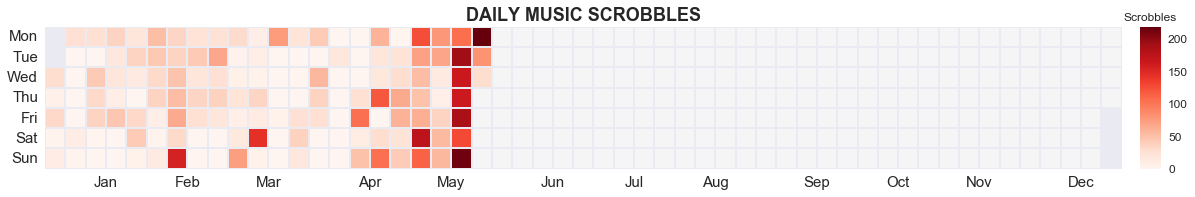

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))

# data
music["date"] = music["datetime"].dt.date
all_days = pd.date_range(start = music["date"].min(), end = music["date"].max())
events = pd.Series(music.groupby("date").count()['datetime'], index = all_days).fillna(0).astype('int')

# calmap plot
cax = calmap.yearplot(events, ax = ax)
cax.yaxis.set_ticks_position('left')
cax.tick_params(axis='both', labelsize=15)

# colorbar
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.25)
cbar = fig.colorbar(cax.get_children()[1], cax=lcax)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_title("Scrobbles")

cax.set_title("DAILY MUSIC SCROBBLES", fontsize = 18, fontweight = "bold")
plt.show()

We can see many red squares on April-May, indicating a higher intensity of listening count. One reason is that the DKI Jakarta Government has issued a regulation on the limitation of large-scale social interactions (or Pembatasan Sosial Berskala Besar, PSBB) to against the spread of COVID-19. Listening to music is my go-to activity when working from home to stay focused and not distracted. Let's create a new function `isPSBB` to indicate whether the PSBB regulation is applied (16 March 2020 - 8 June 2020).

In [25]:
isPSBB = lambda x: "PSBB" if pd.to_datetime("2020-03-16") <= x < pd.to_datetime("2020-06-08") else "Non-PSBB"

Next we are going to analyze how are the average scrobbles by each day of the week. Therefore, we create a `groupbyDOW()` function to produce a pivot table for both `music` data and `all_date`. We analyze the average instead of total scrobbles because during the data collection, we don't cover the whole weekly cycle, e.g. 1 January 2020 is on Wednesday, let's say the timestamp of data collection is on Friday. Using total scrobbles won't be fair since the last Wednesday, Thursday, and Friday are calculated, meanwhile scrobbles for Saturday to Tuesday are not available yet.

In [26]:
def groupbyDOW(data):
    dow_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data["dow"] = data["datetime"].dt.day_name()
    data["dow"] = pd.Categorical(data["dow"], categories = dow_list, ordered = True)
    data["PSBB"] = data["datetime"].apply(isPSBB)
    return data.pivot_table(index = "dow", columns = "PSBB", aggfunc = "count", margins = True)\
            ["datetime"].iloc[:-1]

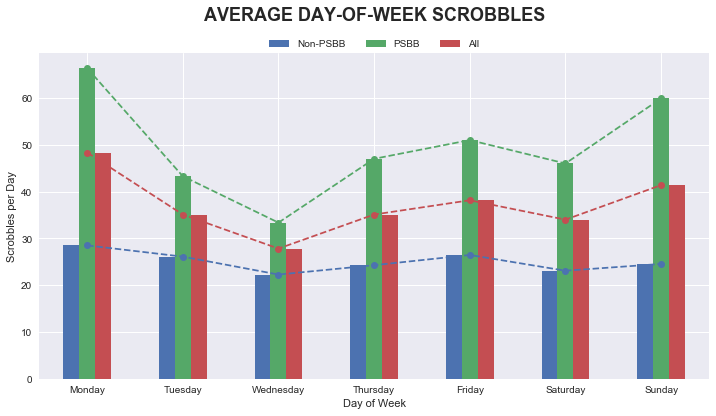

In [27]:
all_date = pd.DataFrame(all_days, columns = ["datetime"])
number_of_dow = groupbyDOW(all_date)
dow_avg_scrobbles = groupbyDOW(music)/number_of_dow

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
dow_avg_scrobbles.plot(kind = "bar", rot = 0, ax = ax)
dow_avg_scrobbles.plot(kind = "line", linestyle = '--', marker = 'o', ax = ax)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Scrobbles per Day")
ax.set_title("AVERAGE DAY-OF-WEEK SCROBBLES", y = 1.08, fontsize = 18, fontweight = "bold")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),
          bbox_to_anchor = (0.5, 1), loc = "lower center",
          ncol = 3, borderaxespad = 0)
plt.show()

I listen to more songs during PSBB than Non-PSBB on every day of the week (DOW). During the Non-PSBB period, there is no much difference in the average scrobbles for every DOW. But during PSBB, I listen less on mid-weekday (Tuesday - Wednesday) and more during the weekend. On average, I listen to 30-40 songs each day. Next we are going to analyze how is the hourly total scrobbles?

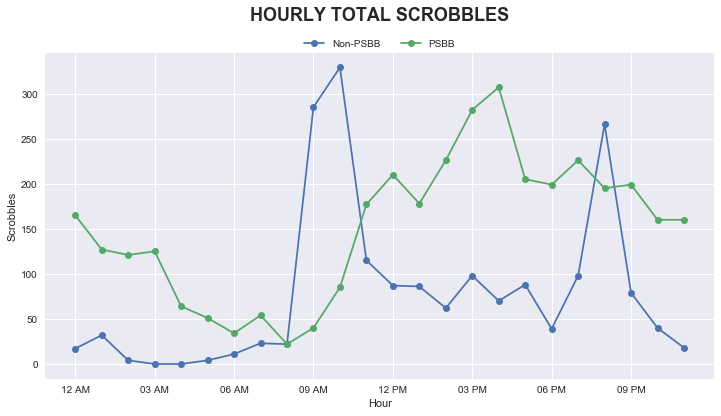

In [28]:
hour_list = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
music["hour"] = music["datetime"].dt.hour \
                 .apply(lambda x: datetime.strptime(str(x), "%H").strftime("%I %p"))
music["hour"] = pd.Categorical(music["hour"], categories = hour_list, ordered = True)

ax = music.groupby(["hour", "PSBB"]).count()["datetime"].unstack().fillna(0)\
        .plot(xticks = range(0, 24, 3), marker = 'o', figsize = (12, 6))\

ax.set_xlabel("Hour")
ax.set_ylabel("Scrobbles")
ax.set_title("HOURLY TOTAL SCROBBLES", y = 1.08, fontsize = 18, fontweight = "bold")
ax.legend(bbox_to_anchor = (0.5, 1), loc = "lower center",
          ncol = 2, borderaxespad = 0)
plt.show()

During Non-PSBB, there are 2 peaks at 10 AM and 8 PM which indicate my round trip commute hours getting to and from work. Meanwhile during PSBB, the peak at 4 PM is when I usually took a break from working. Another thing to notice is during PSBB I still listen to music from 12 AM to 3 AM, indicating a worse sleep cycle than during Non-PSBB. Maybe I should try to adjust my sleep schedule :( Anyway, in conclusion, from the graph we can see a drastic change in my music listening habit during PSBB compared to Non-PSBB. Next, we further breakdown my music listening pattern by each hour and DOW, considering the total scrobbles and not distinguished by PSBB period as follows:

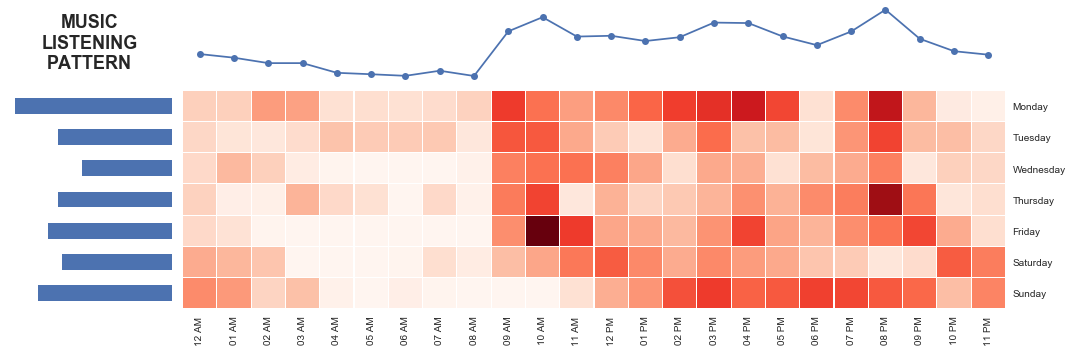

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 5),
                                             gridspec_kw = {'height_ratios': [1, 3],
                                                            'width_ratios': [1, 5]})
# ax[0][0]: blank
ax1.text(0.5, 0.5, "MUSIC\nLISTENING\nPATTERN",
         verticalalignment = "center", horizontalalignment = "center",
         fontsize = 18, fontweight = "bold")
ax1.axis("off")

# ax[0][1]: lineplot
music["hour"].value_counts().sort_index().plot(xlim = (-0.5, 23.5), marker = 'o', ax = ax2)
ax2.axis("off")

# ax[1][0]: barplot
dow_scrobbles = music["dow"].value_counts().sort_index()/number_of_dow["All"]
dow_scrobbles.sort_index(ascending = False).plot(kind = 'barh', ax = ax3).invert_xaxis()
ax3.axis("off")

# ax[1][1]: heatmap
music_time = music.pivot_table(index = "dow",
                                columns = "hour",
                                values = "track_name",
                                aggfunc = "count").fillna(0).astype('int')
hm = sns.heatmap(music_time, linewidths = 0.1, cmap = "Reds", cbar = False, ax = ax4)
hm.yaxis.set_ticks_position('right')
plt.yticks(rotation=0)

plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

The most scrobbles took place on Friday at 10 AM, maybe I was just too excited for the upcoming weekends so I listened to more music :) The light red blocks indicate my rest/break hour, this time we can see there is a shift of my sleep cycle during the weekends compared to weekdays. In the next section, let's visualize my top music by the number of scrobbles.

## Top Music
Before we visualize any of the top music, let's change the font family to `GULIM` since the `artist_name`, `track_name`, and `album_name` may contain a Korean alphabet (hangeul).

In [30]:
matplotlib.rcParams['font.sans-serif'] = ['GULIM', 'sans-serif']

First, let's see how many total scrobbles, unique artists and tracks that I've listened:

In [31]:
print(f'Total Scrobbles: {music.shape[0]}')
print(f'Unique Artists: {music["artist_name"].unique().size}')
print(f'Unique Tracks: {music["artist_track_name"].unique().size}')

Total Scrobbles: 5485
Unique Artists: 143
Unique Tracks: 544


Let's see the top 10 artists by number of scrobbles.

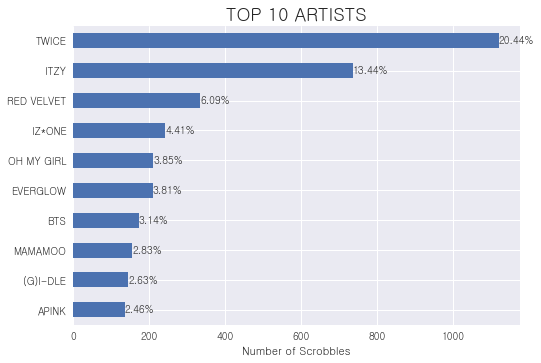

In [32]:
n_artists = 10
top_artists = music["artist_name"].value_counts().head(n_artists).sort_values()
ax = top_artists.plot(kind = 'barh')
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    ax.text(rect.get_x() + width, 
            rect.get_y() + height/2, 
            f'{round(100*width/music.shape[0], 2)}%', 
            ha = 'left',
            va = 'center',
            fontsize = 10)
ax.set_xlabel("Number of Scrobbles")
plt.title(f"TOP {n_artists} ARTISTS", fontsize = 18)
plt.show()

So my playlist is dominated by Korean girl-groups and it's quite mindblowing how the top two made up more than one-third of my total scrobbles. Let's get their biography summary on Last.fm using `network`:

In [33]:
md(
    network.get_artist(top_artists.index[-1]).get_bio_summary()
)

TWICE is a nine-member South Korean girl group formed by JYP Entertainment through the 2015 reality show SIXTEEN. The group is composed of: Nayeon, Jeongyeon, Momo, Sana, Jihyo, Mina, Dahyun, Chaeyoung and Tzuyu. 

On February 11, 2015, Park Jin-young announced that the lineup of JYP Entertainment's upcoming seven-member girl group would be decided through SIXTEEN, a competition survival show that would air on Mnet later that year. The show began on May 5 and ended with Nayeon, Jeongyeon, Sana, Jihyo, Mina, Dahyun, and Chaeyoung as the winners. <a href="https://www.last.fm/music/TWICE">Read more on Last.fm</a>

In [34]:
md(
    network.get_artist(top_artists.index[-2]).get_bio_summary()
)

ITZY is a South Korean girl group formed by JYP Entertainment, consisting of 5 members: Yeji, Lia, Ryujin, Chaeryeong, and Yuna. The group debuted on February 12, 2019, with "달라달라 (DALLA DALLA)" from their debut single album, IT'z Different. <a href="https://www.last.fm/music/Itzy">Read more on Last.fm</a>

Both groups are from JYP Entertainment, one of the Big 3 music industry agencies in South Korea. Many songs from JYP artists suits my music preferences. Next, we're going to see the top 20 tracks by the number of scrobbles.

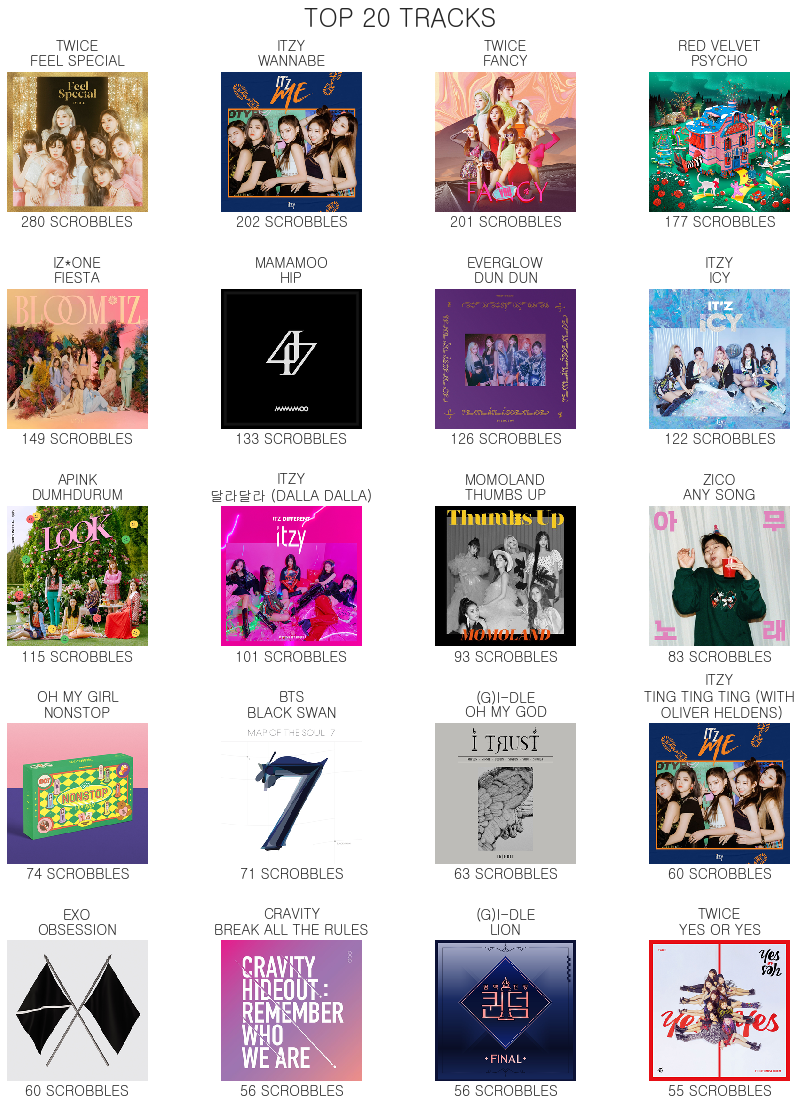

In [35]:
n_tracks = 20
ncol = 4
nrow = math.ceil(n_tracks/ncol)

fig, axes = plt.subplots(nrow, ncol, figsize=(3*ncol, 3*nrow))

top_tracks = music["artist_track_name"].value_counts().head(n_tracks).sort_values(ascending = False)

for ax, (artist_track, scrobbles) in zip(axes.flat, top_tracks.iteritems()):
    artist, track = artist_track.split(' - ')
    img = plt.imread(mapping2image[artist_track])
    ax.imshow(img)
    track = re.sub("(.{20})", "\\1\n", track)
    ax.set_title(f'{artist}\n{track}', fontsize = 14)
    ax.set_xlabel(f'{scrobbles} SCROBBLES', fontsize = 14)
    ax.set_xticks([])
    ax.set_yticks([])

if n_tracks%ncol != 0:
    for col in range(n_tracks%ncol, ncol):
        axes[-1][col].axis("off")
    
plt.tight_layout()
fig.suptitle(f"TOP {n_tracks} TRACKS", fontsize = 25, y = 1.02)
plt.show()

Lastly, let's see the top 3 tracks (including with the name of the album) for each artist who is on my top 5 artists list.

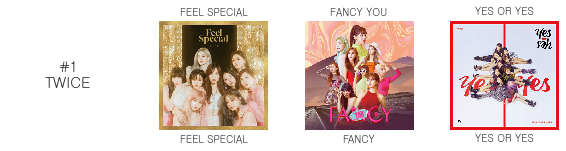

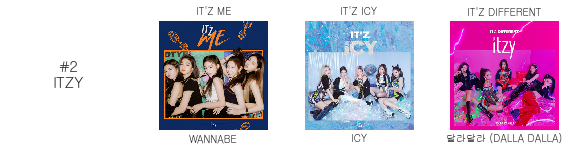

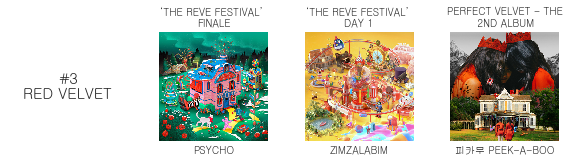

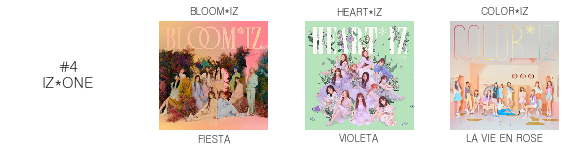

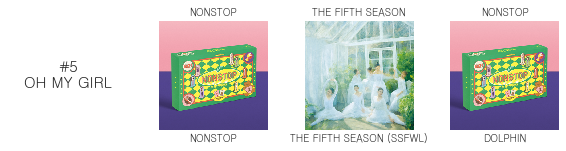

In [36]:
n_artists = 5
n_tracks_by_artist = 3

for pos, choose_artist in enumerate(top_artists.sort_values(ascending = False).head(n_artists).index):
    fig, axes = plt.subplots(1, 4, figsize = (10, 2))
    top_tracks_by_artist = music[music["artist_name"] == choose_artist]["track_name"].value_counts()\
                            .head(n_tracks_by_artist).sort_values(ascending = False)
    
    axes[0].text(0.5, 0.5, f"#{pos+1}\n{choose_artist}",
                 verticalalignment = "center", horizontalalignment = "center",
                 fontsize = 15)
    axes[0].axis("off")
    
    for ax, (track, scrobbles) in zip(axes[1:], top_tracks_by_artist.iteritems()):
        artist_track = ' - '.join([choose_artist, track])
        img = plt.imread(mapping2image[artist_track])
        ax.imshow(img)
        album = re.sub("(.{20})", "\\1\n", mapping2album[artist_track])
        ax.set_title(album, fontsize = 10)
        ax.set_xlabel(track, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])

# What's Next?
We successfully combine Spotify music streaming history and scrobbles
from Last.fm API. The combined data is then cleansed and visualized to gain insight on how my music listening habit changes over time and my overall music preferences. Several things can be done in the future:
- Instead of using a static plot, we can re-create the plot to be interactive using `plotly`
- Make a personal music listening dashboard
- Re-visit this notebook at the end of 2020 and update the insight to get a complete report